In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import structure
import solver

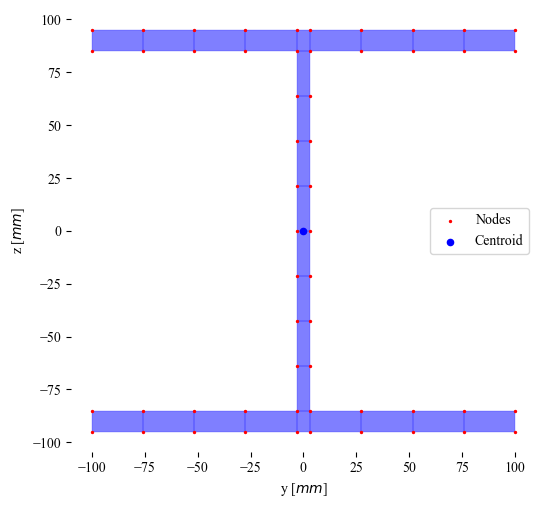

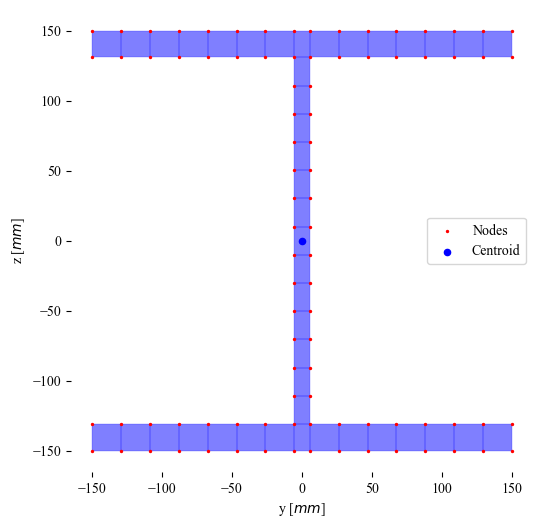

In [2]:
HEA_200 = H_beam(web_width     =   6.5,
                 web_height    = 170.0,
                 flange_width  = 200.0,
                 flange_height =  10.0)
beam = Mesh(HEA_200, mesh_type="quadrilateral", mesh_size=20)
beam.plot()

HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
column = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=20)
column.plot()


In [3]:
struc = structure.Frame(column            = column, 
						beam              = beam, 
						number_of_stories = 1, 
						story_height      = 3000, 
						story_width       = 7000,
						load_DOFs         = [12],
						nodal_loads       = [1],
						number_of_sections_per_elemnt = 6)

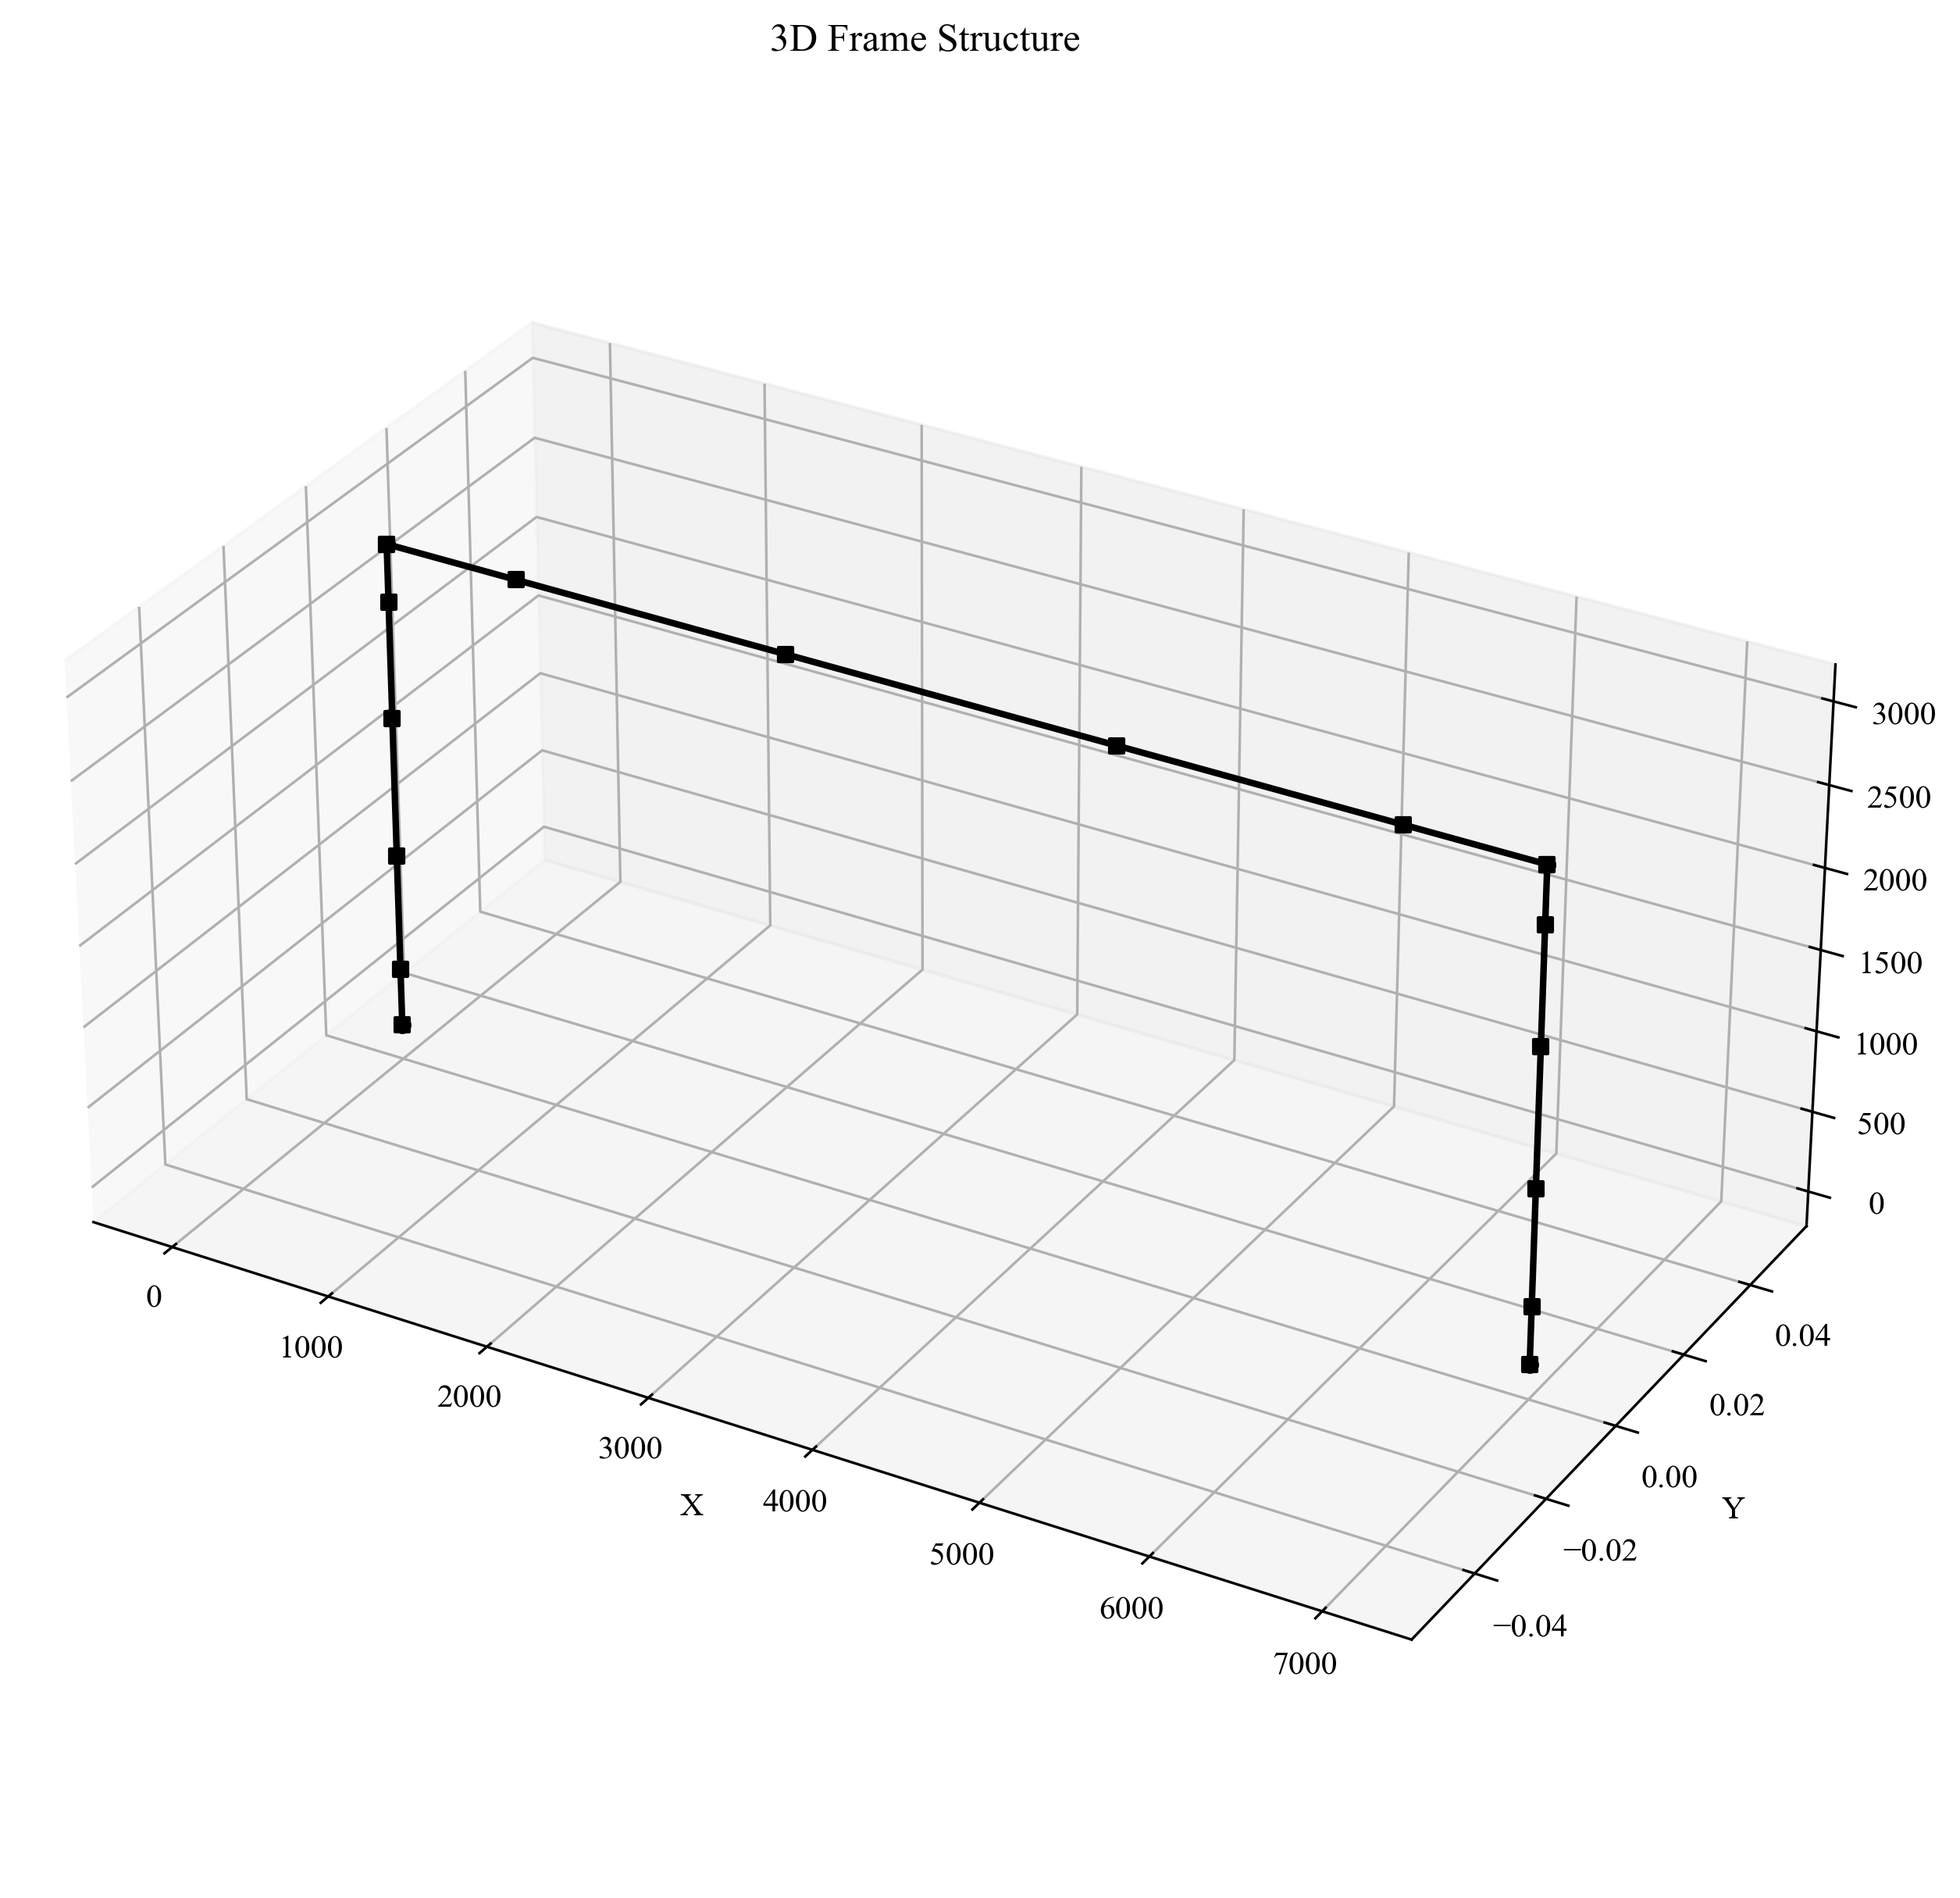

In [9]:
lin_solver = solver.Linear(struc)
lin_solver.plot_initial_structure()
non_linear_solver = solver.Nonlinear(struc, constraint="Load")

In [5]:
increments = np.zeros(100)
increments.fill(5000)

u_history, lambda_history = non_linear_solver.solve(increments)

  0%|          | 0/100 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
         Beam Element  2
            Element iteration  0
         Beam Element  3
            Element iteration  0
      Residuals Norm  4.615766485603325e-09
NR Converged!
----------------------------------------------
Load step 2 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
         Beam Element  2
            Element iteration  0
         Beam Element  3
            Element iteration  0
      Residuals Norm  3.7672992433437125e-09
NR Converged!
----------------------------------------------
Load step 3 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
         Beam Element  2
            Element iteration  0
         Beam Element  3
            Element iteration  0
      Residuals Norm  3.737941486775063e-09
NR Converge

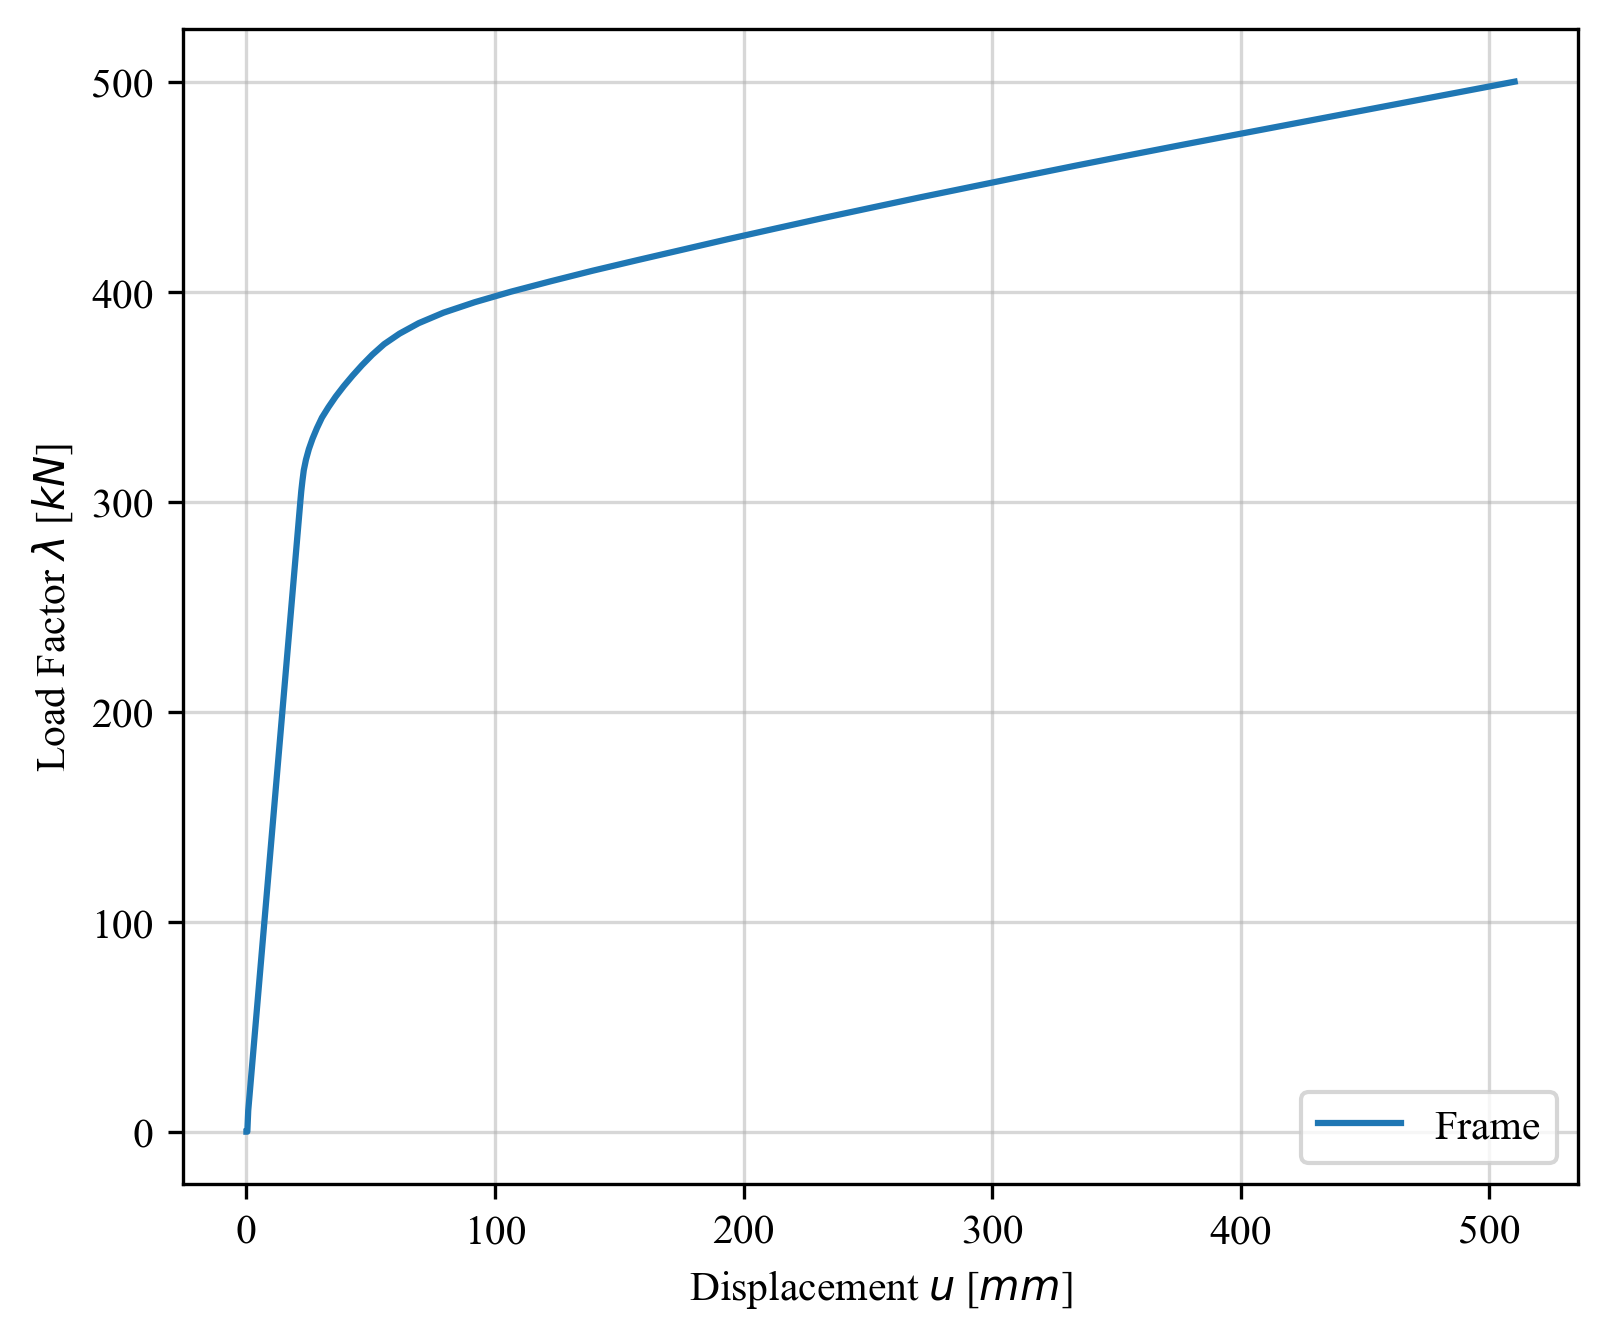

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300

ls=["-", (0, (3, 5, 1, 5, 1, 5)),"dashed", "dotted","-"]

ax.plot(u_history[:,12], lambda_history/1000,   label="Frame", ls=ls[0])
ax.set_xlabel("Displacement $u$ [$mm$]")
ax.set_ylabel("Load Factor $\\lambda$ [$kN$]")
ax.legend(loc="lower right")
ax.grid(alpha=0.5)

plt.show()

In [7]:
non_linear_solver.displacements = non_linear_solver.structure.displacements
non_linear_solver.forces        = np.dot(non_linear_solver.structure.K_global, non_linear_solver.structure.displacements)

non_linear_solver.print_nodal_displacements_and_forces()

--------------------------------------
Node 0
          Displacement
u [mm]        0.000000
v [mm]        0.000000
w [mm]        0.000000
θx [rad]      0.000000
θy [rad]      0.000000
θz [rad]      0.000000
          Internal Force
Fx [kN]         0.000000
Fy [kN]         0.000000
Fz [kN]         0.000000
Mx [kNm]        0.000000
My [kNm]        0.000000
Mz [kNm]        0.000000
--------------------------------------
Node 1
          Displacement
u [mm]        0.000000
v [mm]        0.000000
w [mm]        0.000000
θx [rad]      0.000000
θy [rad]      0.000000
θz [rad]      0.000000
          Internal Force
Fx [kN]         0.000000
Fy [kN]         0.000000
Fz [kN]         0.000000
Mx [kNm]        0.000000
My [kNm]        0.000000
Mz [kNm]        0.000000
--------------------------------------
Node 2
          Displacement
u [mm]      510.196185
v [mm]       -0.000000
w [mm]        0.337565
θx [rad]      0.000000
θy [rad]      0.189541
θz [rad]     -0.000000
          Internal Force
Fx [